In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the data
df = pd.read_csv('NSE-TATA.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%y')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

      Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  10/8/20  208.00  222.25  206.85  216.00  215.15               4642146   
1  10/5/20  217.00  218.60  205.90  210.25  209.20               3519515   
2  10/4/20  223.50  227.80  216.15  217.25  218.20               1728786   
3  10/3/20  230.00  237.50  225.75  226.45  227.60               1708590   
4  10/1/20  234.55  234.60  221.05  230.30  230.90               1534749   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1234, 8)

 Shape of training set:
(987, 2)

 Shape of validation set:
(247, 2)

 RMSE value on validation set:
104.30985396995965


<ipython-input-2-5d92a0665f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-2-5d92a0665f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


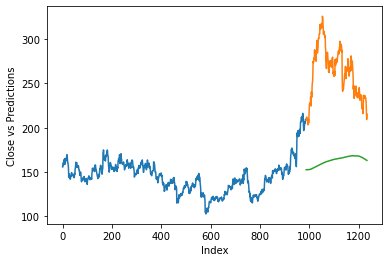

In [2]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.ylabel('Close vs Predictions')
plt.xlabel('Index')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
